In [54]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# import the path
import os
path = os.path.abspath(os.path.join("..", "08_portfolio_management", "portfolio_data.csv"))

# read the CSV file
df = pd.read_csv(path)

# drop Position_Weight
df = df.drop(columns=['Position_Weight'])

# show the first few rows of the dataframe
df.head()

,Ticker,Last_Price,Quantity,Position_Value
0,AAPL,232.560,18.00,4186.080
1,AMD,168.580,18.00,3034.440
2,ASML,654.300,6.00,3925.800
3,BNB,857.400,13.09,11223.366
4,BR50,21.855,213.00,4655.115


In [55]:
# top 10 holdings
top_10 = df.nlargest(10, 'Position_Value')
top_10

,Ticker,Last_Price,Quantity,Position_Value
5,BTC,111968.6300,2.1571,241527.531773
16,META,738.7000,60.0000,44322.000000
8,ETH,4459.3400,4.3100,19219.755400
7,EQQQ,489.6000,39.0000,19094.400000
15,MC,513.1000,22.0000,11288.200000
3,BNB,857.4000,13.0900,11223.366000
12,IWDE,101.5700,96.0000,9750.720000
6,DOGE,0.2153,40270.0000,8670.131000
22,TSLA,345.9800,23.0000,7957.540000
18,NKE,77.9200,79.0000,6155.680000


In [56]:
# to simplify the calculations and data downloads, we will use only top 10 holdings
port_list = top_10.Ticker.to_list()

# some Ticker should be adjusted for the data source
port_list = [ticker.replace("IWDE", "IWDE.MI").replace("EQQQ", "EQQQ.MI").replace("BNB", "BNB-USD").replace("BTC", "BTC-USD").replace("ETH", "ETH-USD").replace("DOGE", "DOGE-USD").replace("MC", "LVMUY") for ticker in port_list]

In [57]:
port_list

['BTC-USD',
 'META',
 'ETH-USD',
 'EQQQ.MI',
 'LVMUY',
 'BNB-USD',
 'IWDE.MI',
 'DOGE-USD',
 'TSLA',
 'NKE']

Risk Parity Portfolio Optimization

In [58]:
import datetime as dt
import yfinance as yf

start_date = "2020-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")

# df_stocks = yf.download(port_list, start=start_date, end=end_date)

# # download the data to csv
# df_stocks.to_csv("top_10_stocks.csv")

In [59]:
# read the data from csv
df_stocks = pd.read_csv("top_10_stocks.csv", header=[0,1], index_col=0)

# keep only Close prices (level 0 = 'Close')
df_stocks = df_stocks.loc[:, df_stocks.columns.get_level_values(0) == 'Close']

# drop level 0 (keep only ticker names)
df_stocks.columns = df_stocks.columns.droplevel(0)

# replace -USD with "", replace .MI with ""
df_stocks.columns = df_stocks.columns.str.replace('-USD', '', regex=False)
df_stocks.columns = df_stocks.columns.str.replace('.MI', '', regex=False)

# ffill and dropna()
df_stocks = df_stocks.ffill().dropna()

df_stocks.head()

Ticker,BNB,BTC,DOGE,EQQQ,ETH,IWDE,LVMUY,META,NKE,TSLA
Date,,,,,,,,,,
2020-01-02,13.027011,6985.470215,0.002009,187.924530,127.410179,57.299999,85.065201,208.635391,95.368210,28.684000
2020-01-03,13.660452,7344.884277,0.002145,188.373917,134.171707,57.160000,84.307289,207.531448,95.106918,29.534000
2020-01-04,13.891512,7410.656738,0.002241,188.373917,135.069366,57.160000,84.307289,207.531448,95.106918,29.534000
2020-01-05,14.111019,7411.317383,0.002419,188.373917,136.276779,57.160000,84.307289,207.531448,95.106918,29.534000
2020-01-06,14.957808,7769.219238,0.002463,188.354431,144.304153,57.060001,84.289238,211.440033,95.022911,30.102667


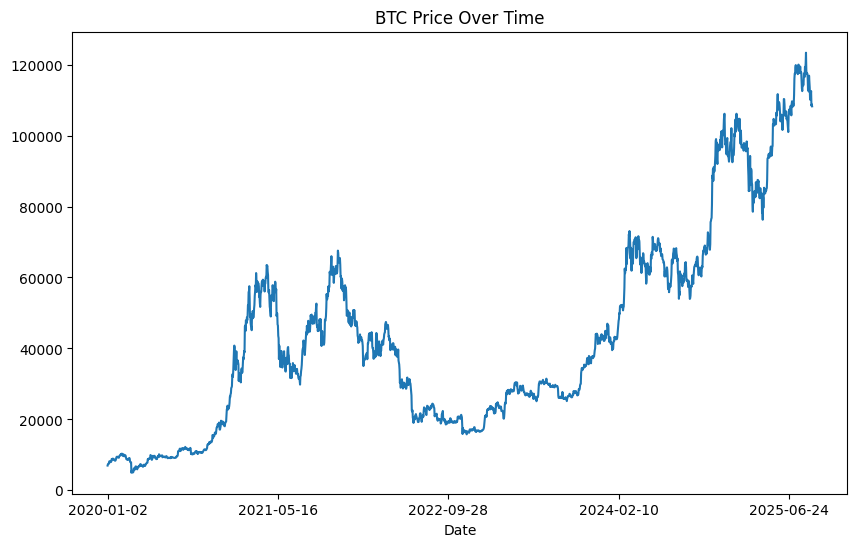

In [60]:
# check data with some plot
df_stocks.BTC.plot(figsize=(10, 6), title='BTC Price Over Time');
# df_stocks.META.plot(figsize=(10, 6), title='META Price Over Time');

In [61]:
prices = df_stocks.copy()
returns = prices.pct_change().dropna()
returns.head()

Ticker,BNB,BTC,DOGE,EQQQ,ETH,IWDE,LVMUY,META,NKE,TSLA
Date,,,,,,,,,,
2020-01-03,0.048625,0.051452,0.067695,0.002391,0.053069,-0.002443,-0.008910,-0.005291,-0.002740,0.029633
2020-01-04,0.016915,0.008955,0.044755,0.000000,0.006690,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.015802,0.000089,0.079429,0.000000,0.008939,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.060009,0.048291,0.018189,-0.000103,0.058905,-0.001749,-0.000214,0.018834,-0.000883,0.019255
2020-01-07,0.003439,0.050774,-0.012180,0.010684,-0.005268,0.003680,-0.009420,0.002164,-0.000491,0.038801
